In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

Sign-language-digits-dataset
column_2C_weka.csv
column_3C_weka.csv



In [2]:
data = pd.read_csv('../input/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [5]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]

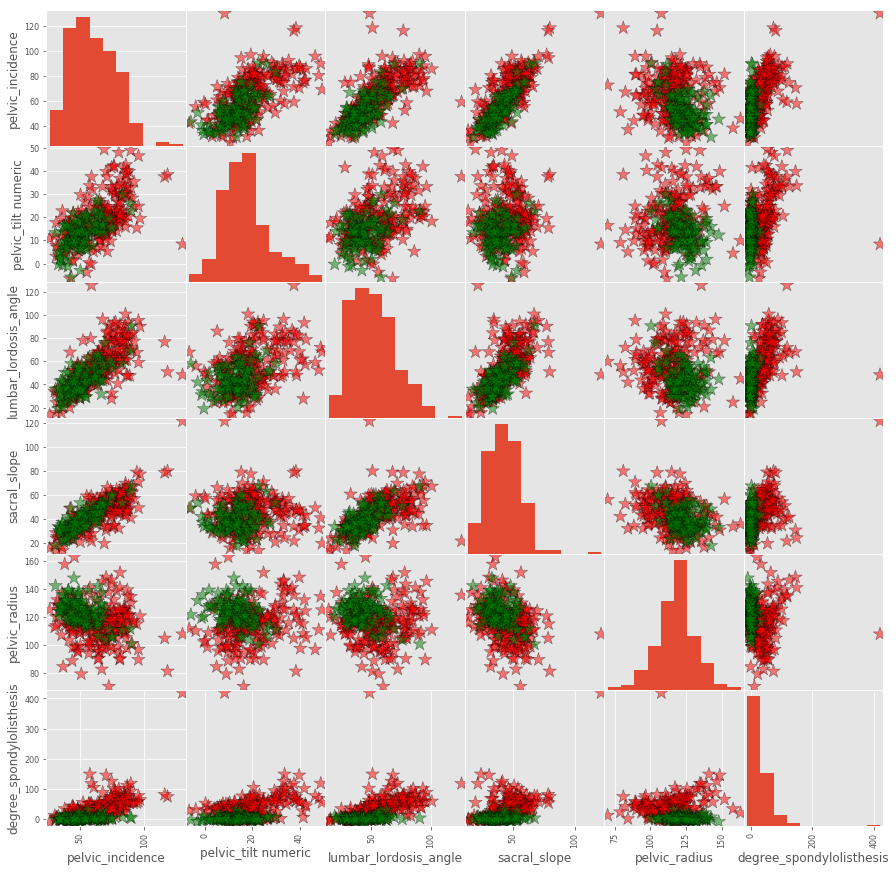

In [6]:
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

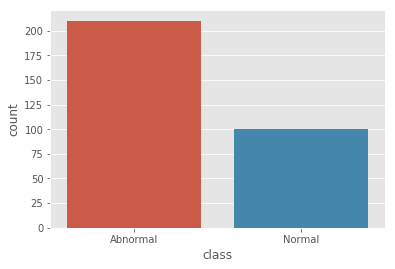

In [7]:
sns.countplot(x="class", data=data)

In [8]:
data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']

In [11]:
type(y)

pandas.core.series.Series

In [15]:
x.shape

(310, 6)

In [14]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,
                                                    random_state = 1)

In [18]:
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal']


In [19]:
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8602150537634409


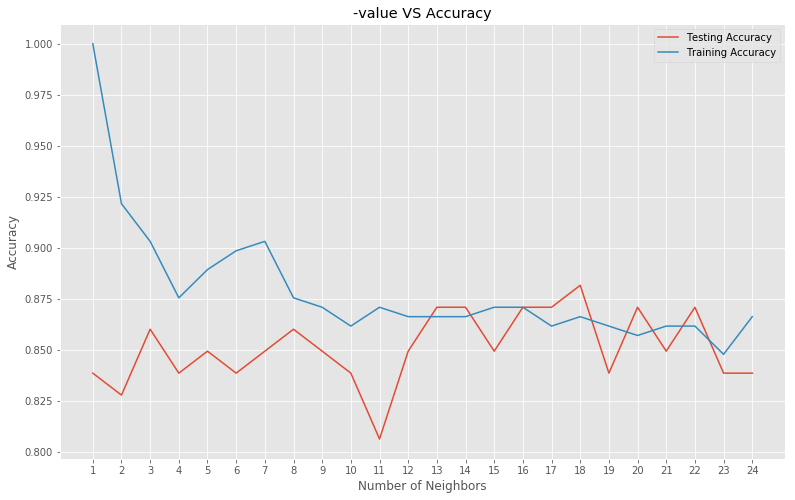

Best accuracy is 0.8817204301075269 with K = 18


In [20]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for k in neig:
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

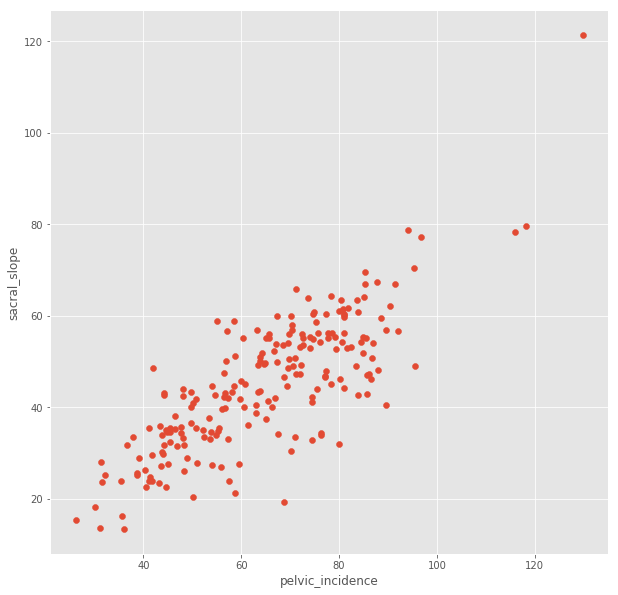

In [21]:
data1 = data[data['class'] == 'Abnormal']
x= np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg = LinearRegression()

R^2 score:  0.6458410481075871


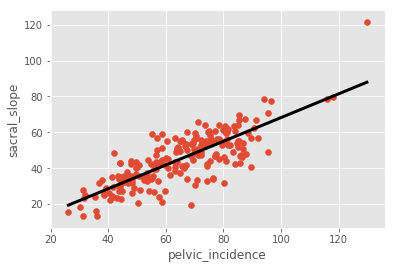

In [24]:
#Fit
reg.fit(x,y)
#Predict
predicted = reg.predict(predict_space)
#R^2
print('R^2 score: ', reg.score(x,y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [25]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.mean(cv_result))

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848676


In [26]:
from sklearn.linear_model import Lasso

In [27]:
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


In [28]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [29]:
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[58  8]
 [ 7 20]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.89      0.88      0.89        66
      Normal       0.71      0.74      0.73        27

   micro avg       0.84      0.84      0.84        93
   macro avg       0.80      0.81      0.81        93
weighted avg       0.84      0.84      0.84        93



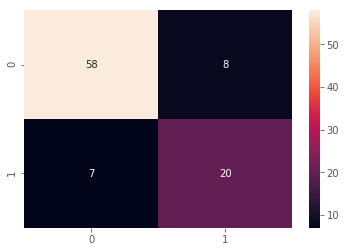

In [30]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [31]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']

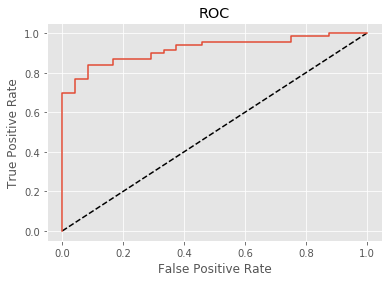

In [32]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [33]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn import datasets
digits = datasets.load_digits()

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [36]:
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'C': [1, 10, 15, 20, 45],
            'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            'gamma': ['auto', 'scale']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 20, 21, 25],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [1, 10, 20, 21, 25]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0, 1]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random']
        }
    }
}

In [37]:
scores= []
for model_name, md in model_params.items():
    clf = GridSearchCV(md['model'], md['params'], cv=5, return_train_score = False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

C:\Users\panyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\panyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\panyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
pd.DataFrame(scores)

,best_params,best_score,model
0,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.973845,svm
1,"{'criterion': 'gini', 'n_estimators': 25}",0.931553,random_forest
2,{'C': 1},0.920979,logistic_regression
3,{},0.806344,naive_bayes_gaussian
4,{'alpha': 0},0.872009,naive_bayes_multinomial
5,"{'criterion': 'entropy', 'splitter': 'best'}",0.797997,decision_tree


In [39]:
#trying parameters
grid = {'n_neighbors': np.arange(1, 50)}
#GridSearchCV
knn_cv = GridSearchCV(KNeighborsClassifier(), grid, cv = 5)
knn_cv.fit(x,y)

#print hyperparameter
print('Tuned hyperparameter: ', knn_cv.best_params_)
print('Best score: ', knn_cv.best_score_)

Tuned hyperparameter:  {'n_neighbors': 7}
Best score:  0.8225806451612904


In [40]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# C high: overfit, C low: underfit
# 2. penalty l1 or l2
# Hyperparameter grid
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                    test_size = 0.3, random_state = 12)
logistic_params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1','l2']}
logireg_cv = GridSearchCV(LogisticRegression(), logistic_params, cv = 5)
logireg_cv.fit(x_train, y_train)
# Print the optimal parameters and best score
print('Tuned hyperparameter: ', logireg_cv.best_params_)
print('Best score: ', logireg_cv.best_score_)

Tuned hyperparameter:  {'C': 10.0, 'penalty': 'l1'}
Best score:  0.8525345622119815


C:\Users\panyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
#Load data
data = pd.read_csv('../input/column_2C_weka.csv')
#get_dummies: convert categorical data to numerical data
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [42]:
df.drop('class_Normal', axis = 1, inplace = True)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [43]:
pd.get_dummies(data, drop_first = True).head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


Pipelines

Pipelines can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in pipeline, such as selection, normalization and classification. Pipeline serves two purposes here:

1.Convenience: You only have to call fit and predict onece on your data to fit a whole sequence of estimators

2.Joint parameter selection: You can grid search over parameters of all estimators in the pipeline at once.

All estimators in a pipeline, except the last one, must be transformers(i.e. must have a transform methond). The last classifier can be classifier, etc)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
#sequence of estimators you want to applied, 'reduce_dim','clf'are names
#PCA and SVC are estimators
#conbine these estimator as a whole sequence
estimators = [('reduce_dim', PCA(n_components = 2)), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [45]:
from sklearn.datasets import load_iris
#return_X_y : boolean, default=False
#If True, returns ``(data, target)`` instead of a Bunch object
data, target = load_iris(return_X_y = True)
pipe.fit(data, target).score(data, target)

0.9533333333333334

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
#another constructor
make_pipeline(Binarizer(), KNeighborsClassifier())

Pipeline(memory=None,
     steps=[('binarizer', Binarizer(copy=True, threshold=0.0)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [47]:
pipe2 = make_pipeline(Binarizer(), KNeighborsClassifier())
pipe2

Pipeline(memory=None,
     steps=[('binarizer', Binarizer(copy=True, threshold=0.0)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [48]:
#return first estimator
pipe.steps[0]

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [49]:
#use as a dictionary, name as key, return estimator
pipe.named_steps['reduce_dim']

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
#How to access parameters name: stepName__parameterName
#set_params: set parameters for estimator
pipe.set_params(clf__C = 10)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [51]:
params = dict(reduce_dim__n_components = [1, 1, 2, 3, 4],
             clf__C = [0.1, 10, 100])
grid_search_cv = GridSearchCV(pipe, params, cv = 10)
grid_search_cv.fit(data, target)
print('Best Score:', grid_search_cv.best_score_)
print('Best Parameters', grid_search_cv.best_params_)

Best Score: 0.9733333333333334
Best Parameters {'clf__C': 10, 'reduce_dim__n_components': 4}


In [52]:
params = dict(reduce_dim=[None, PCA(2), PCA(3)],
             clf = [SVC(), LogisticRegression()],
             clf__C = [0.1, 10, 100])
grid_search_cv = GridSearchCV(pipe, params, cv = 10)
grid_search_cv.fit(data, target)
print('Best Score:', grid_search_cv.best_score_)
print('Best Parameters', grid_search_cv.best_params_)

Best Score: 0.98
Best Parameters {'clf': LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'clf__C': 100, 'reduce_dim': None}


Pipeline's purpose is to assemble several steps like svm(classifier) and standardization(pre-processing)

In [53]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


C:\Users\panyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                             random_state = 1)
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)
cv.fit(x_train, y_train)

y_pred = cv.predict(x_test)
print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


C:\Users\panyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
print("Best Params ", cv.best_params_)
print("Best Scores ", cv.best_score_)

Best Params  {'SVM__C': 100, 'SVM__gamma': 0.01}
Best Scores  0.8588709677419355


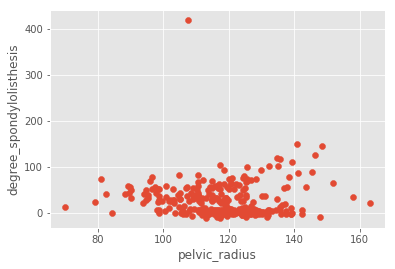

In [56]:
# As you can see there is no labels in data
data = pd.read_csv('../input/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [57]:
data2 = data.loc[:, ['pelvic_radius','degree_spondylolisthesis']]
data2.head()

,pelvic_radius,degree_spondylolisthesis
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501


In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(data2)
kmeans.predict(data2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

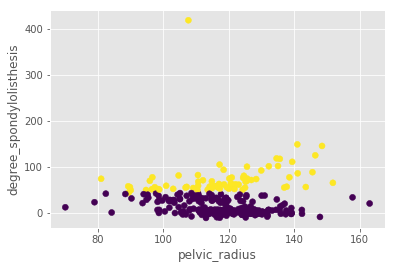

In [60]:
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'],
           c = kmeans.predict(data2))
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [61]:
np.count_nonzero(kmeans.predict(data2))

72

In [62]:
# cross tabulation table
labels = kmeans.predict(data2)
ctable = pd.crosstab(labels, data['class'])
ctable

class,Abnormal,Normal
row_0,,
0,138,100
1,72,0


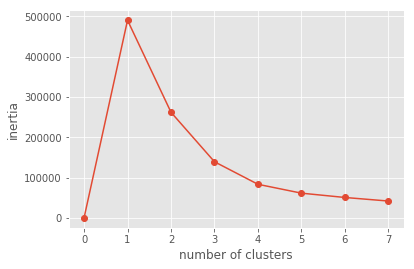

In [63]:
inertia_ls = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    inertia_ls[i] = kmeans.inertia_ 
plt.plot(range(0,8), inertia_ls, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [64]:
data = pd.read_csv('../input/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(StandardScaler(), kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
ctable = pd.crosstab(labels, data['class'])
print(ctable)

class  Abnormal  Normal
row_0                  
0            94      90
1           116      10


In [66]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data3.loc[200:220, :], method = 'single')

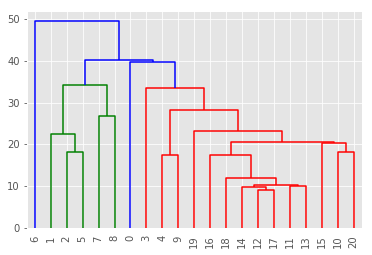

In [67]:
dendrogram(merg, leaf_rotation = 90)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def L_fun(h, y):
    if h < y-1:
        return 1
    elif y-1 <= h and h<= y:
        return y-h
    elif y<=h and h<= y+1:
        return h-y
    elif h>y+1:
        return 1

In [3]:
def loss_func(h,y):
    if abs(y-h)>1:
        return 1
    elif abs(y-h)<=1:
        return abs(y-h)

In [18]:
def R_func(h):
    y1 = 0*101.5
    y2 = 1*101.5
    y3 = 1.5*101.5
    return((loss_func(h, y1)+ loss_func(h, y2)+ loss_func(h, y3))/3)

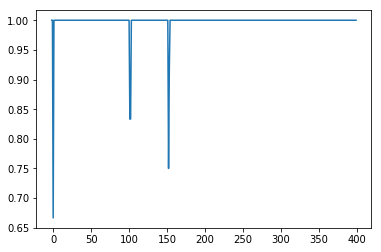

In [22]:
lst = []
for i in np.arange(-2,400):
    lst.append(R_func(i))
plt.plot( np.arange(-2,400),lst)

In [195]:
def derL_hub(h,y):
    if h-y > 1:
        return 1
    elif abs(h-y) <= 1:
        return h-y
    elif h-y < -1:
        return -1

def R_hub(h):
    y1 = -1/2
    y2 = 1/2
    y3 = 1
    y4 = 4
    print((derL_hub(h,y1)+ derL_hub(h,y2)+ derL_hub(h,y3)+ derL_hub(h,y4))/4)
    return h- 2*((derL_hub(h,y1)+ derL_hub(h,y2)+ derL_hub(h,y3)+ derL_hub(h,y4))/4)
R_hub(3/4)

0.0


0.75

0.8333333333333334

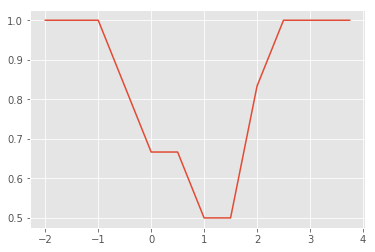

In [202]:
lst = []
for i in np.arange(-2, 4, 0.25):
    lst.append(R_func(i))
plt.plot(np.arange(-2, 4, 0.25),lst)
R_func(2)

In [165]:
R_func(1.25*101)

1.0

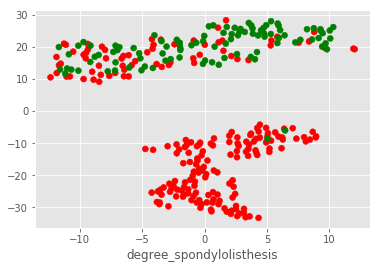

In [71]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100, random_state = 1)
transformed = model.fit_transform(data2)
#transformed pelvic_radius
x = transformed[:,0]
#transformed degree_spondylolisthesis
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [72]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08930072e-11 -5.77350269e-01
  -3.59059872e-12  3.06729795e-12]]


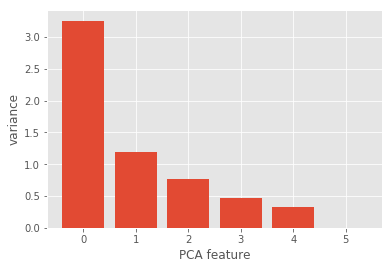

In [73]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

PCA Code Example

In [74]:
import pandas as pd 
import numpy as np
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [75]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]
#stars unpack wt and ko arrays so that column names are a single array
#and we will have 12 columns
#index = row names
data = pd.DataFrame(columns = [*wt, *ko], index = genes)
#rd.randrange(): choose a random item from range(start, stop, step)
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = 
                                rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = 
                                rd.randrange(10, 1000), size = 5)

In [76]:
print(data.shape)
print(data.head())

(100, 10)
       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  361  374  399  338  327  435  400  399  385  411
gene2  642  652  660  633  642   24   20   30   22   20
gene3  510  488  491  491  446  745  711  720  714  726
gene4  983  936  887  912  964  419  477  495  449  438
gene5  363  368  328  314  354  764  701  726  716  735


In [90]:
#after scale, mean = 0, std = 1, (measurements-mean)**2/number of measurements
#scale function expects the samples to be rows instead of column, so transpose
scaled_data = preprocessing.scale(data.T)
#another way to standardize
scaled_data = StandardScaler().fit_transform(data.T)
#where calculating loading scores and the variation each pc accounts for
pca.fit(scaled_data)
#generate coordinates for a PCA graph based on the loading scores and 
#the scaled data
pca_data = pca.transform(scaled_data)

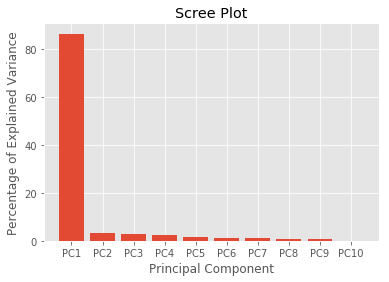

In [91]:
#Determine how many PCA should be drawn
#calculate the percentage of variance that each pc accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Almost all of the variation is along the first PC, so a 2-D graph, using PC1 and PC2, should represent the original data

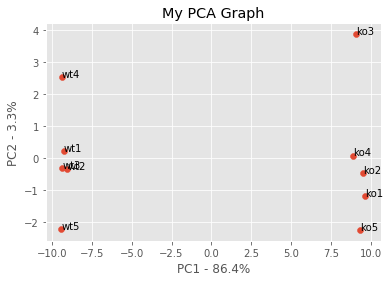

In [96]:
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

wt samples clustered on left side, ko samples clustered on right side. Separation of the two clusters along x-axis suggests that wt samples are very different from ko samples.

In [98]:
loading_scores = pd.Series(pca.components_[0], index = genes)
#sort loading scores based on their magnitudes
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene93   -0.107538
gene2    -0.107535
gene69   -0.107512
gene16    0.107483
gene63    0.107478
gene97   -0.107474
gene22    0.107466
gene17    0.107456
gene50    0.107449
gene25   -0.107448
dtype: float64


values are similar, so a lot of genes played a role in separating the samples, rather than just one or two.

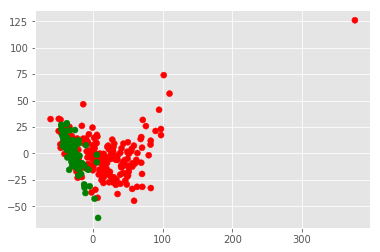

In [108]:
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y, c= color_list)
plt.show()

Sign Language Picture Predict

Note:

L1 Regularization: Lasso Regression, adds absolute value of magnitude of coefficient as penalty term, shrink to 0, remove some unimportant features

L2 Regularization: Ridge Regression, adds squared magnitude

In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv', 'Sign-language-digits-dataset']


In [111]:
# load data set
x_load = np.load('../input/Sign-language-digits-dataset/X.npy')
y_load = np.load('../input/Sign-language-digits-dataset/Y.npy')

In [113]:
x_load.shape

(2062, 64, 64)

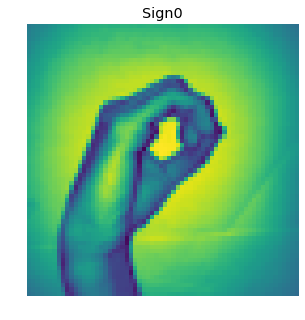

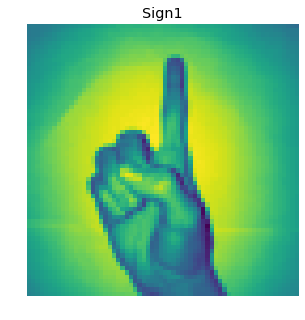

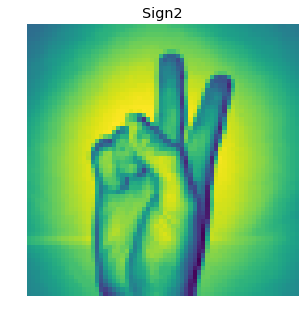

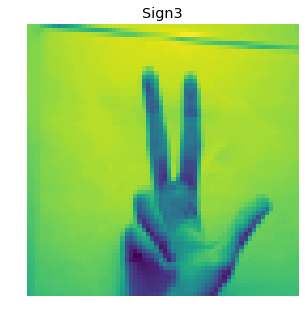

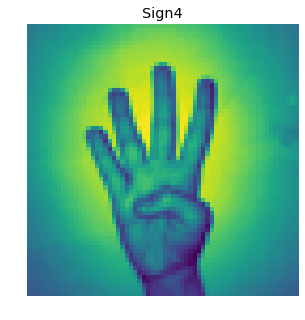

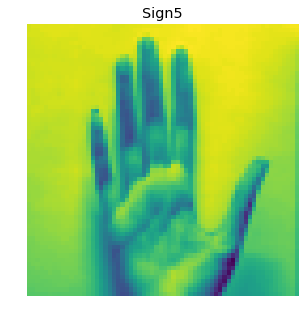

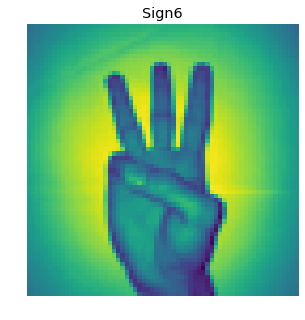

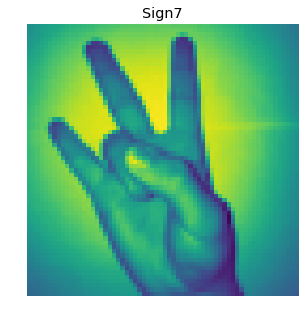

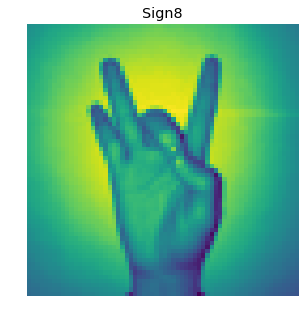

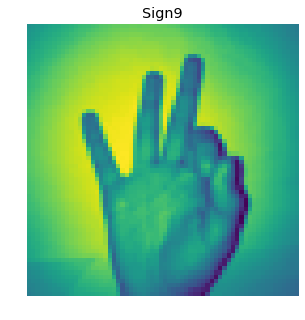

In [115]:
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(0, 10):
    plt.figure(figsize = (8, 5))
    plt.imshow(x_load[image_index_list[each]].reshape(64, 64))
    plt.axis('off')
    plt.title("Sign" + str(each))
plt.show()

In [235]:
X = x_load.reshape(len(x_load), -1)
train = X
test = X[image_index_list, :]
n_pixels = X.shape[1]
#Upper half of the faces
X_train = train[:, :n_pixels // 2]
X_test = test[:, :n_pixels // 2]
#Lower half of the faces
Y_train = train[:, n_pixels//2 :]
Y_test = test[:, n_pixels//2: ]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2062, 2048)
(2062, 2048)
(10, 2048)
(10, 2048)


In [238]:
#Fit estimators
estimator = RidgeCV()
start = time.time()
estimator.fit(X_train, Y_train)
end = time.time()
print('Training time is ' + str(end - start) + ' second.')
start = time.time()
y_test_predict = estimator.predict(X_test)
end = time.time()
print('Prediction time is ' + str(end - start) + ' second.')

Training time is 5.674771308898926 second.
Prediction time is 0.004987478256225586 second.


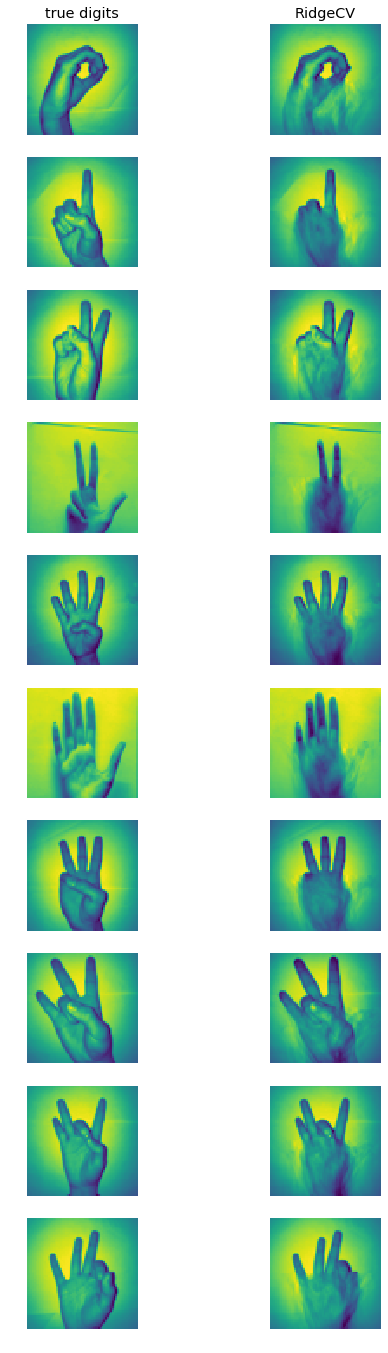

In [254]:
image_shape = (64, 64)
plt.figure(figsize = (8, 24))
for i in range(10):
    true_digits = np.hstack((X_test[i], Y_test[i]))
    if i == 0:
        sub = plt.subplot(10, 2, 2*i + 1,
                          title = 'true digits')
    else:
         sub = plt.subplot(10, 2, 2*i + 1)
    sub.imshow(true_digits.reshape(image_shape))
    sub.axis('off')
    predicted_digits = np.hstack((X_test[i], y_test_predict[i]))
    if i == 0:
        sub = plt.subplot(10, 2, 2* (i + 1),
                          title = 'RidgeCV')
    else:
         sub = plt.subplot(10, 2, 2*(i + 1))
    sub.imshow(predicted_digits.reshape(image_shape))
    sub.axis('off')
plt.show()

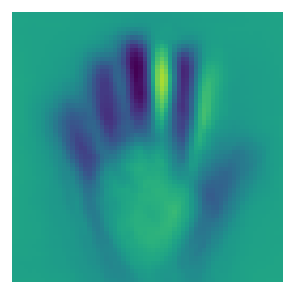

In [281]:
(n_samples, n_features) = X.shape
estimator = PCA(5, whiten = True)
estimator.fit(X)
components = estimator.components_
images = components[1:10]
plt.figure(figsize = (6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), abs(comp.min()))
    plt.imshow(comp.reshape(image_shape), vmax = vmax)
    plt.xticks(())
    plt.yticks(())
plt.show()